In [5]:
using PyPlot
include("acoustic_solver.jl")

backward_diff_y (generic function with 1 method)

In [6]:
Nx = 101; Ny = 101;
dx = 0.005; dy = dx;

Fs = 1000;
dt = 1/Fs;
Nt = 701;
t = range(0, step=dt, length=Nt);

# source_func = sin.(2*pi*10*t);
source_func = source_ricker(10, 0.1, t);
# plot(t, source_func); title("Source Function")

701-element Array{Float64,1}:
 -0.0009692515861872075  
 -0.0011548717469943084  
 -0.0013729985618227357  
 -0.0016287072398854074  
 -0.0019277469640000828  
 -0.0022766088773385675  
 -0.002682597130184043   
 -0.0031539023953574574  
 -0.003699677089604868   
 -0.004330111347884033   
 -0.005056508588769882   
 -0.0058913592833398495  
 -0.006848411298815276   
  ⋮                      
 -1.3603993856315658e-146
 -4.263688864919462e-147 
 -1.3336590439439955e-147
 -4.1633638109383e-148   
 -1.2971319576897539e-148
 -4.033334228080625e-149 
 -1.2516546850497726e-149
 -3.876547588095144e-150 
 -1.1982460096666202e-150
 -3.6964697175155134e-151
 -1.1380690473374538e-151
 -3.4969576822188067e-152

In [7]:
source = zeros(Nt,6);
for i = 1:6
    source[:,i] .= source_func;
end
source[:,6] .=  sin.(2*pi*10*t);

source_position = zeros(Int, 6, 2);
for i = 1:6
    source_position[i,2] = (i-1)*20 + 1
    source_position[i,1] = 3;
end

# Model 1
receiver_position = zeros(Int,101,2);
for i = 1:101
    receiver_position[i,2] = (i-1)*1 + 1
    receiver_position[i,1] = 1;
end

c = ones(Nx, Ny); rho = ones(Nx,Ny);
a0 = 1 ./ (c.^2 .* rho);
b0 = 1 ./ rho;

c[50:end,:] .= 1.2;

a = 1 ./ (c.^2 .* rho);
b = 1 ./ rho;
# using ImageFiltering
# a0 = imfilter(a, Kernel.gaussian(30));
# b0 = imfilter(b, Kernel.gaussian(30));

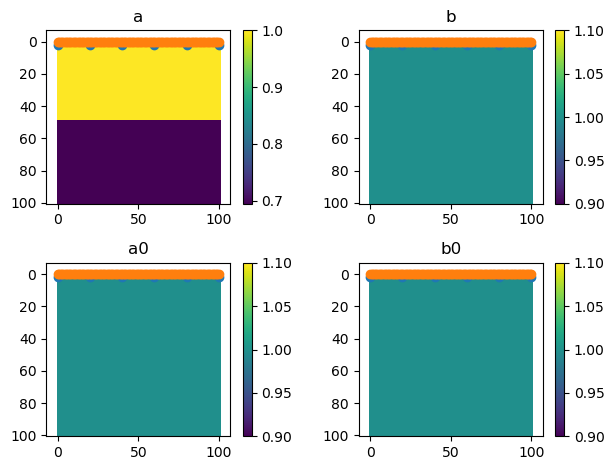

In [8]:
subplot(221)
imshow(a); colorbar(); title("a")
scatter(source_position[:,2].-1, source_position[:,1].-1)
scatter(receiver_position[:,2].-1, receiver_position[:,1].-1)

subplot(222)
imshow(b); colorbar(); title("b")
scatter(source_position[:,2].-1, source_position[:,1].-1)
scatter(receiver_position[:,2].-1, receiver_position[:,1].-1)

subplot(223)
imshow(a0); colorbar(); title("a0")
scatter(source_position[:,2].-1, source_position[:,1].-1)
scatter(receiver_position[:,2].-1, receiver_position[:,1].-1)

subplot(224)
imshow(b0); colorbar(); title("b0")
scatter(source_position[:,2].-1, source_position[:,1].-1)
scatter(receiver_position[:,2].-1, receiver_position[:,1].-1)

tight_layout()

In [10]:
@time d, u = acoustic_solver(a, b, Nx, Ny, Nt, dx, dy, dt, source_position, source, receiver_position; source_index=0);

 11.525219 seconds (113.16 k allocations: 9.248 GiB, 18.34% gc time)


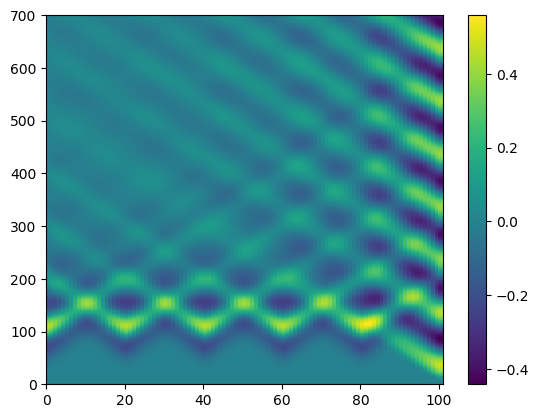

PyObject <matplotlib.colorbar.Colorbar object at 0x14e011a90>

In [11]:
pcolor(d); colorbar()

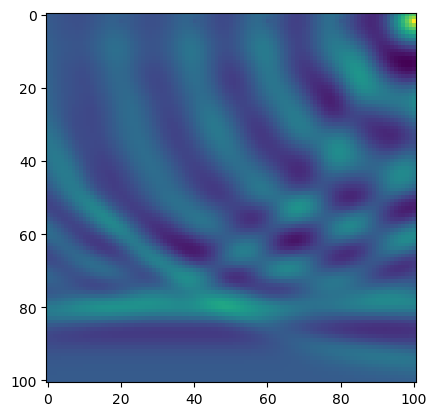

PyObject <matplotlib.image.AxesImage object at 0x1471e0eb8>

In [12]:
imshow(u[:,:,540])

In [17]:
@time dd, uu = acoustic_solver_all(a, b, Nx, Ny, Nt, dx, dy, dt, source_position, source, receiver_position; pml_len=30, pml_alpha=50);

 62.857648 seconds (678.87 k allocations: 55.810 GiB, 17.45% gc time)


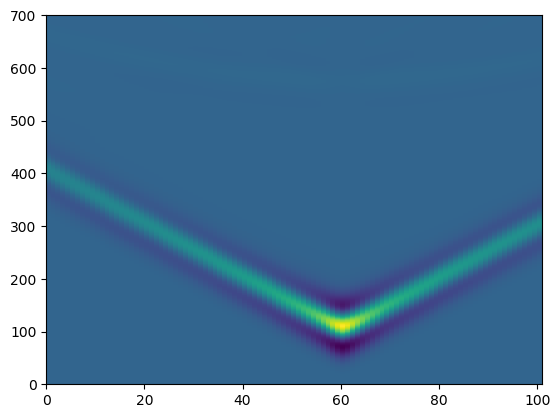

PyObject <matplotlib.collections.PolyCollection object at 0x1421ca828>

In [15]:
pcolor(dd[:,:,4])

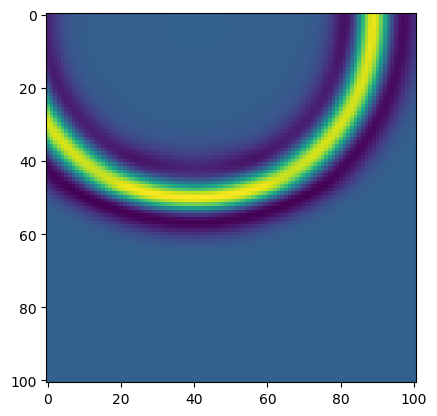

PyObject <matplotlib.image.AxesImage object at 0x143f0edd8>

In [16]:
imshow(uu[:,:,350,3])

### Parallel

In [18]:
addprocs(2)

2-element Array{Int64,1}:
 2
 3

In [19]:
@everywhere include("acoustic_solver.jl");
@everywhere include("data.jl")

In [23]:
@time ddd, uuu = acoustic_solver_all_parallel(a, b, Nx, Ny, Nt, dx, dy, dt, source_position, source, receiver_position; pml_len=30, pml_alpha=50);

 41.075793 seconds (2.23 k allocations: 169.234 KiB)


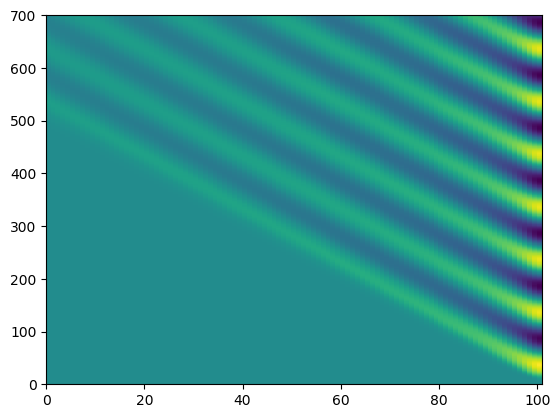

PyObject <matplotlib.collections.PolyCollection object at 0x142c7e8d0>

In [21]:
pcolor(ddd[:,:,6])

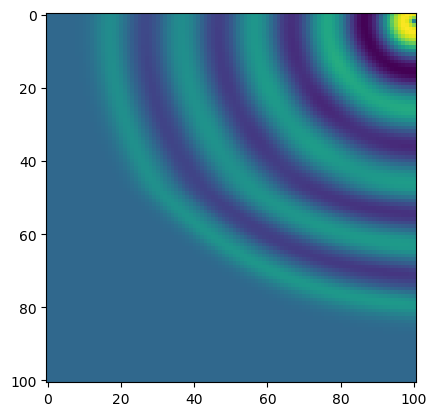

PyObject <matplotlib.image.AxesImage object at 0x14580cbe0>

In [22]:
imshow(uuu[:,:,450,6])